# SuperStore Sales Analysis

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_excel('superstore_sales.xlsx')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


#### Information about Dataset

In [3]:
df.shape

(51290, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

#### Reduce Memory Utilization

In [5]:
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype("str")

In [6]:
# Downcast integers
df["quantity"] = pd.to_numeric(df["quantity"], downcast="integer")
df["year"] = pd.to_numeric(df["year"], downcast="integer")

In [7]:
# Downcast floats
for col in ["sales", "discount", "profit", "shipping_cost"]:
    df[col] = pd.to_numeric(df[col], downcast="float")

In [8]:
df["order_date"] = df["order_date"].values.astype("datetime64[D]")
df["ship_date"] = df["ship_date"].values.astype("datetime64[D]")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype        
---  ------          --------------  -----        
 0   order_id        51290 non-null  object       
 1   order_date      51290 non-null  datetime64[s]
 2   ship_date       51290 non-null  datetime64[s]
 3   ship_mode       51290 non-null  object       
 4   customer_name   51290 non-null  object       
 5   segment         51290 non-null  object       
 6   state           51290 non-null  object       
 7   country         51290 non-null  object       
 8   market          51290 non-null  object       
 9   region          51290 non-null  object       
 10  product_id      51290 non-null  object       
 11  category        51290 non-null  object       
 12  sub_category    51290 non-null  object       
 13  product_name    51290 non-null  object       
 14  sales           51290 non-null  float64      
 15  quantity        512

#### Count the number of missing values

In [10]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

#### Which are the most selling products?

In [20]:
boughts = df.groupby('product_name')['quantity'].sum().reset_index()
boughts = boughts.sort_values(by='quantity', ascending=False).head(10)
boughts

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


C:\Users\pc\AppData\Local\Temp\ipykernel_15960\1301031796.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_name', y='quantity', data=boughts, palette='viridis')


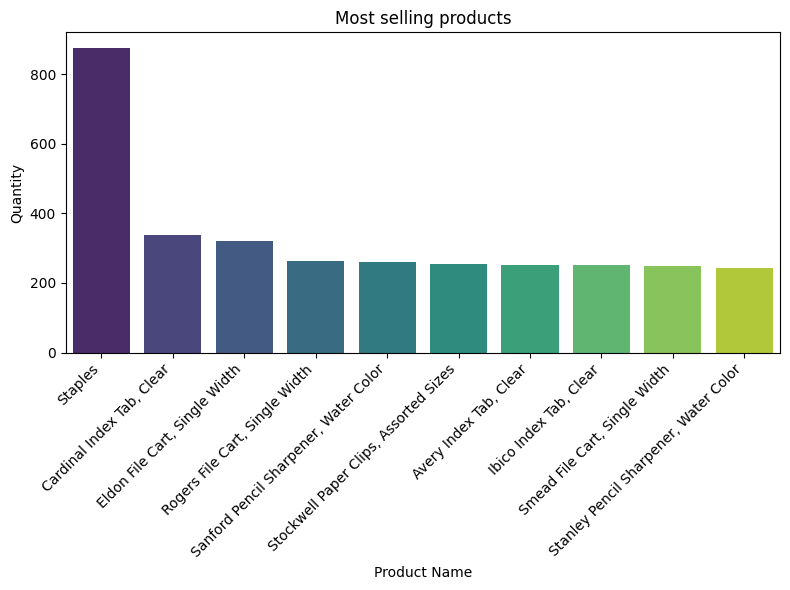

In [21]:
# --- Visualization using Seaborn ---
plt.figure(figsize=(8, 6))
sns.barplot(x='product_name', y='quantity', data=boughts, palette='viridis')
plt.title('Most selling products')
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 <h4> Which are the Top 10 products by sales?

In [22]:
productSales = df.groupby('product_name')['sales'].sum().reset_index()
productSales = productSales.sort_values(by='sales', ascending=False).head(10)
productSales.head(10)

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


<h4> Which are the most profitable products?


In [23]:
profitable_products = df.groupby('product_name')['profit'].sum().reset_index()
profitable_products.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_products.head(10)

,product_name,profit
866,Canon imageCLASS 2200 Advanced Copier,25199.927734
970,"Cisco Smart Phone, Full Size",17238.519531
2415,"Motorola Smart Phone, Full Size",17027.113281
1926,"Hoover Stove, Red",11807.968750
3098,"Sauder Classic Bookcase, Traditional",10672.073242
1714,"Harbour Creations Executive Leather Armchair, ...",10427.326172
2501,"Nokia Smart Phone, Full Size",9938.196289
971,"Cisco Smart Phone, with Caller ID",9786.640625
2502,"Nokia Smart Phone, with Caller ID",9465.326172
589,"Belkin Router, USB",8955.017578


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(1, 0, 'Cisco Smart Phone, Full Size'),
  Text(2, 0, 'Motorola Smart Phone, Full Size'),
  Text(3, 0, 'Hoover Stove, Red'),
  Text(4, 0, 'Sauder Classic Bookcase, Traditional'),
  Text(5, 0, 'Harbour Creations Executive Leather Armchair, Adjustable'),
  Text(6, 0, 'Nokia Smart Phone, Full Size'),
  Text(7, 0, 'Cisco Smart Phone, with Caller ID'),
  Text(8, 0, 'Nokia Smart Phone, with Caller ID'),
  Text(9, 0, 'Belkin Router, USB')])

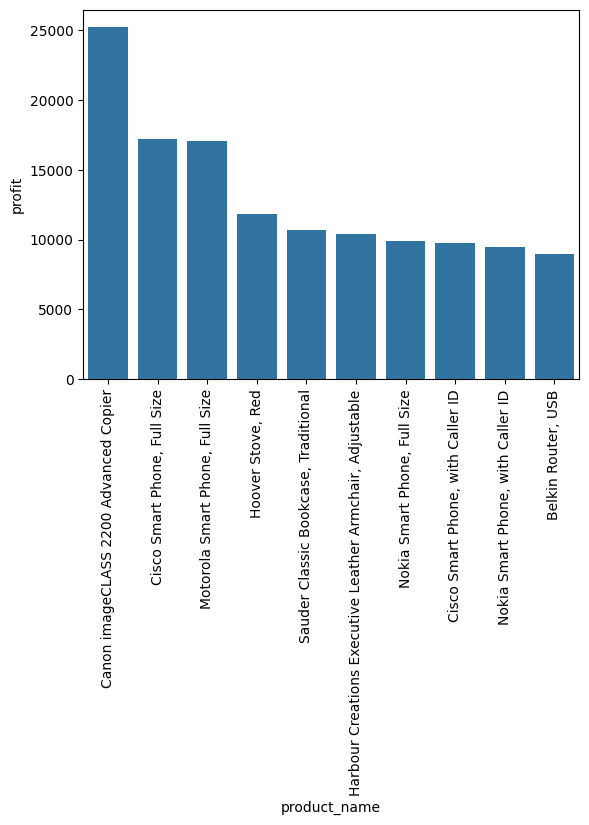

In [24]:
sns.barplot(x='product_name',y='profit', data=profitable_products.head(10).reset_index())
plt.xticks(rotation = 'vertical')

<h4> What category sold the most?


In [26]:
# Sum sales by category
category_sales = df.groupby('category')['sales'].sum().reset_index()
# Sort descending
category_sales = category_sales.sort_values(by='sales', ascending=False)
category_sales

,category,sales
2,Technology,4.744557e+06
0,Furniture,4.110874e+06
1,Office Supplies,3.787070e+06


<h4> Which are the most profitable category?

In [27]:
profitable_category = df.groupby('category')['profit'].sum().reset_index()
profitable_category.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_category

,category,profit
2,Technology,663778.75000
1,Office Supplies,518473.84375
0,Furniture,286782.25000


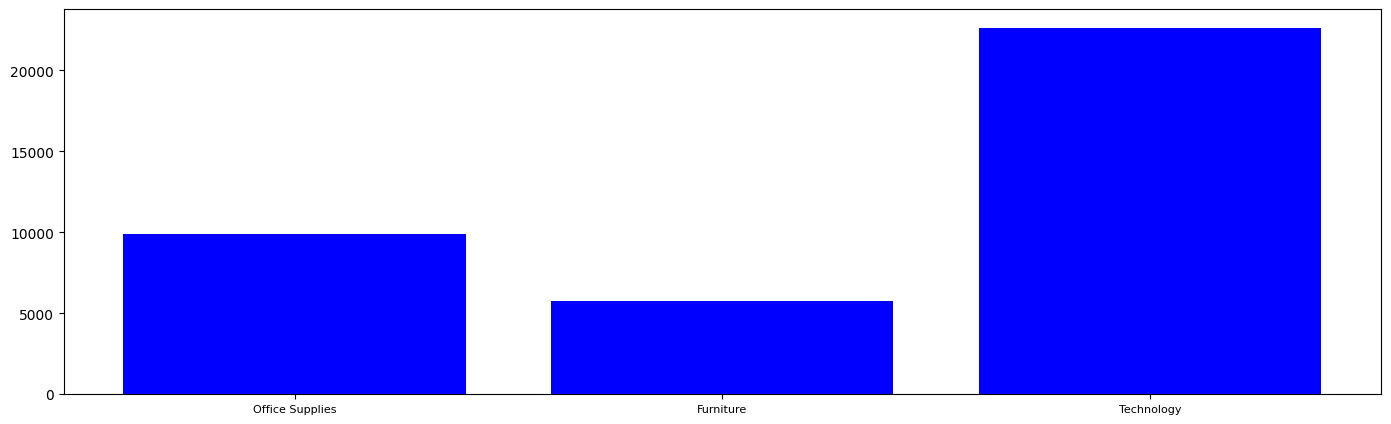

In [28]:
plt.figure(figsize=(17, 5))
plt.bar(df['category'],df['sales'],color = 'b')
plt.xticks(size=8)
plt.show()

<h4> Total sales values by category and subcategory


In [30]:
# Group by category and sub_category, sum only numeric columns
category_sub_summary = df.groupby(['category', 'sub_category'])[['sales', 'quantity', 'profit', 'shipping_cost']].sum().reset_index()
category_sub_summary

,category,sub_category,sales,quantity,profit,shipping_cost
0,Furniture,Bookcases,1.466572e+06,8310,161924.421875,155481.968750
1,Furniture,Chairs,1.501682e+06,12336,141973.796875,164229.359375
2,Furniture,Furnishings,3.855783e+05,11225,46967.425781,40746.765625
3,Furniture,Tables,7.570419e+05,3083,-64083.390625,79861.390625
4,Office Supplies,Appliances,1.011064e+06,6078,141680.593750,108300.585938
5,Office Supplies,Art,3.720920e+05,16301,57953.910156,41287.140625
6,Office Supplies,Binders,4.619115e+05,21429,72449.843750,48181.710938
7,Office Supplies,Envelopes,1.709043e+05,8380,29601.115234,18547.488281
8,Office Supplies,Fasteners,8.324232e+04,8390,11525.423828,9053.337891
9,Office Supplies,Labels,7.340403e+04,9322,15010.511719,8059.674805


<h4> Which are the most selling products in subcategory? 

In [31]:
df.groupby(["category", "sub_category"], as_index=False)["quantity"].count()

,category,sub_category,quantity
0,Furniture,Bookcases,2411
1,Furniture,Chairs,3434
2,Furniture,Furnishings,3170
3,Furniture,Tables,861
4,Office Supplies,Appliances,1755
5,Office Supplies,Art,4883
6,Office Supplies,Binders,6152
7,Office Supplies,Envelopes,2435
8,Office Supplies,Fasteners,2420
9,Office Supplies,Labels,2606


<h4>  Which customer segments are the most profitable ?

In [33]:
profitable_segment = df.groupby(['segment'])['profit'].sum().reset_index()
profitable_segment.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_segment

,segment,profit
0,Consumer,749239.81250
1,Corporate,442785.84375
2,Home Office,277009.18750


([0, 1, 2],
 [Text(0, 0, 'Consumer'), Text(1, 0, 'Corporate'), Text(2, 0, 'Home Office')])

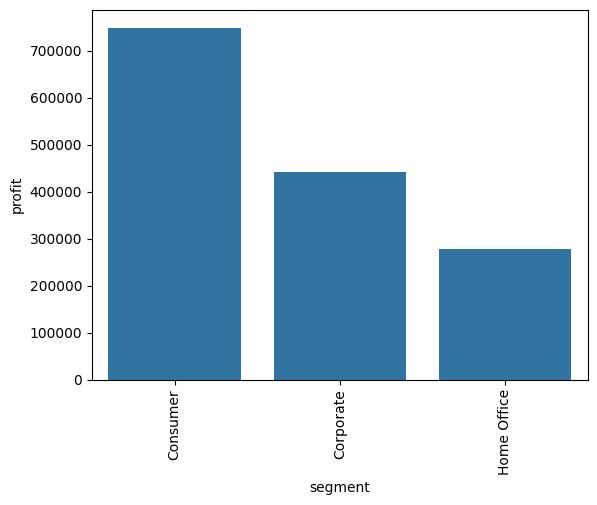

In [34]:
sns.barplot(x='segment',y='profit',data=profitable_segment.reset_index())
plt.xticks(rotation = 'vertical')

<h4> What shipping modes sold the most products?

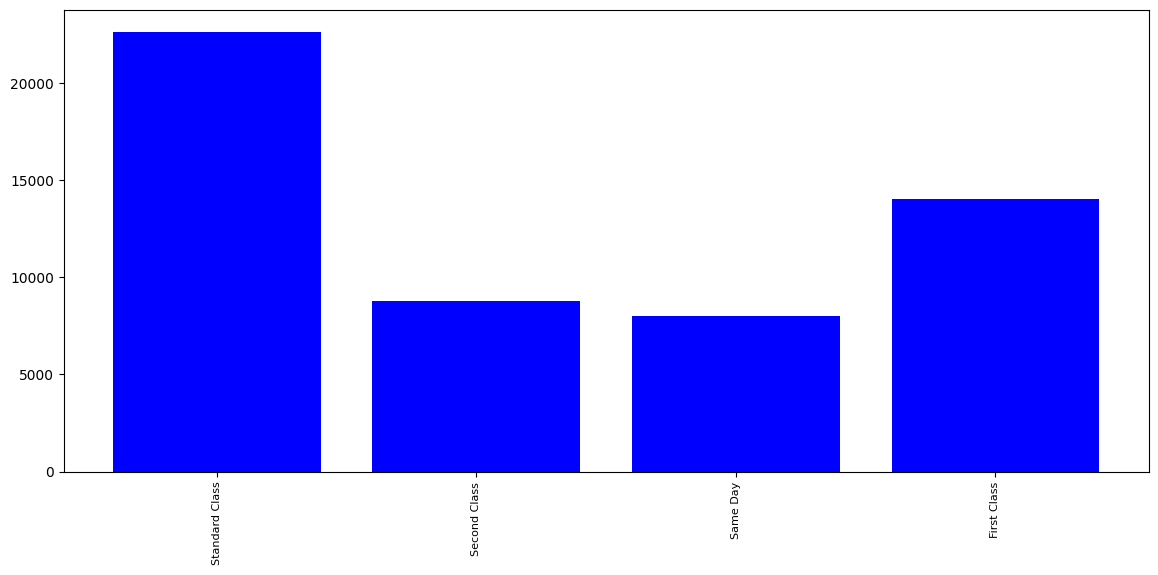

In [35]:
plt.figure(figsize=(14, 6))
plt.bar(df['ship_mode'],df['sales'],color = 'b')
plt.xticks(rotation='vertical', size=8)
plt.show()

#### Visualize the 'Category' column from the Shipmode column dataset standpoints.

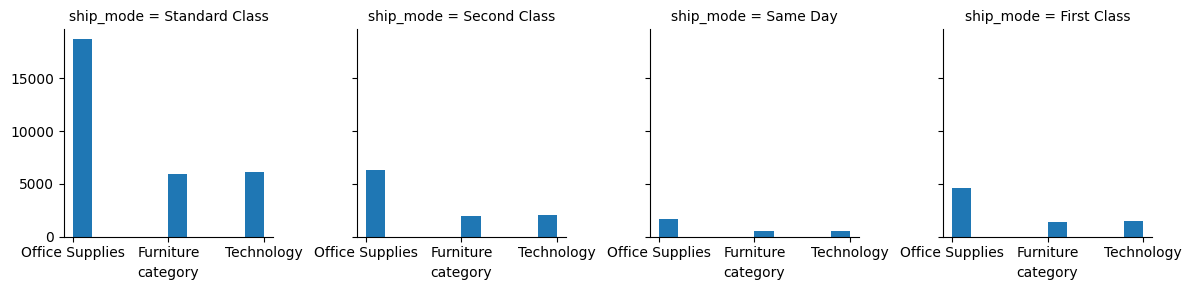

In [36]:
category_hist = sns.FacetGrid(df, col='ship_mode', palette='rainbow')
category_hist.map(plt.hist, 'category')

<h4> What market sold the most products?

C:\Users\pc\AppData\Local\Temp\ipykernel_15960\3647872294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='market',data=df, palette='rainbow')


<Axes: xlabel='market', ylabel='count'>

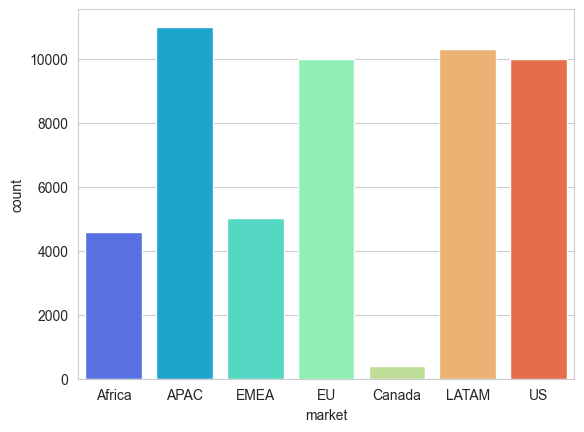

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='market',data=df, palette='rainbow')

<h4> Which are the Top 10 country by sales? 

In [38]:
countries = df.groupby('country')['sales'].sum().reset_index()
countries.sort_values('sales',inplace=True, ascending=False)
countries.head(10)

,country,sales
139,United States,2.297201e+06
6,Australia,9.252359e+05
44,France,8.589311e+05
26,China,7.005620e+05
47,Germany,6.288400e+05
81,Mexico,6.225906e+05
57,India,5.896501e+05
138,United Kingdom,5.285763e+05
58,Indonesia,4.048875e+05
17,Brazil,3.611064e+05


<h4> Create a pie chart with the 10 countries that have the most sales

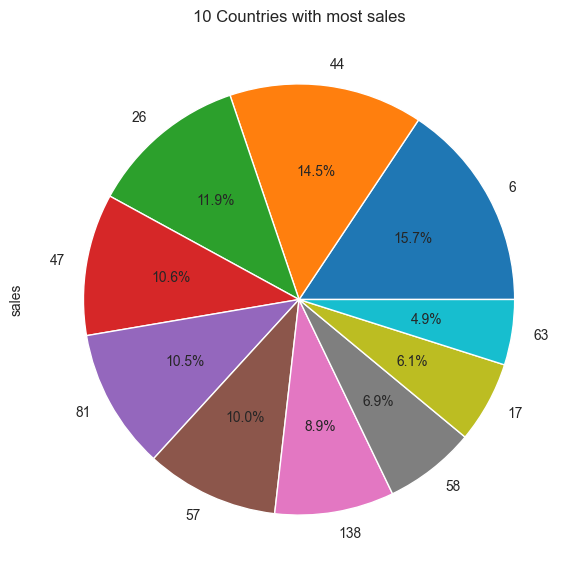

In [39]:
countries = countries.sort_values(by = 'sales',ascending = False)[1:11]
countries['sales'].plot(kind='pie',autopct='%1.1f%%',figsize=(14,7))
plt.title('10 Countries with most sales')
plt.show()

<h4> Which are the average shipping cost for top 10 different countries?

In [40]:
df.groupby('country').agg({'shipping_cost':'mean'}).sort_values('shipping_cost', ascending=False).head(10)

,shipping_cost
country,
Taiwan,155.660721
Chad,148.969986
Lesotho,135.650009
Montenegro,93.937500
Slovenia,61.220001
Republic of the Congo,59.303333
Central African Republic,57.625710
Namibia,50.369999
Bangladesh,46.402882


####  Who are the top-10 most profitable customers?


In [41]:
data10 = df.sort_values('profit',ascending=False).head(10)[['order_id','customer_name','profit']]
data10

,order_id,customer_name,profit
29530,CA-2013-118689,Tamara Chand,8399.975586
36239,CA-2014-140151,Raymond Buch,6719.980957
48097,CA-2014-166709,Hunter Lopez,5039.985840
33011,CA-2013-117121,Adrian Barton,4946.370117
5522,CA-2011-116904,Sanjit Chand,4630.475586
43831,ES-2014-1651774,Patrick Jones,3979.080078
46525,CA-2014-127180,Tom Ashbrook,3919.988770
10265,CA-2012-145352,Christopher Martinez,3177.475098
548,ID-2011-64599,Carol Adams,2939.310059
24420,IN-2013-50809,Cynthia Arntzen,2817.989990


<h4>  Add a ne column (month) 

In [42]:
month = df['order_date'].astype(str) 
month = month.apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
df['month'] = month.map(lambda x: x.month) 
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.139999,35.459999,Medium,2011,1
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.035999,9.720000,Medium,2011,1
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.639999,8.170000,High,2011,1
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055000,4.820000,High,2011,1
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770000,4.700000,Medium,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.518800,0.890000,Medium,2014,12
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.420000,0.490000,Medium,2014,12
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.360000,0.350000,Medium,2014,12
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.560000,0.199000,Medium,2014,12


####  Total sales values by year and month 

In [44]:
date_summary = df.groupby(['year', 'month'])[['sales', 'quantity', 'profit', 'shipping_cost']].sum().reset_index()
date_summary

,year,month,sales,quantity,profit,shipping_cost
0,2011,1,98898.48886,1463,8321.800781,10544.788086
1,2011,2,91152.15698,1224,12417.907227,10681.163086
2,2011,3,145729.36736,1836,15303.568359,13096.185547
3,2011,4,116915.76418,2020,12902.324219,12954.519531
4,2011,5,146747.83610,2013,12183.828125,16443.205078
5,2011,6,215207.38022,3112,23415.246094,23813.109375
6,2011,7,115510.41912,1774,5585.003418,11844.475586
7,2011,8,207581.49122,3035,23713.667969,22001.136719
8,2011,9,290214.45534,3707,35776.882812,29664.851562
9,2011,10,199071.26404,2727,25963.417969,21380.082031


#### Total sales chart by the year 

([0, 1, 2, 3],
 [Text(0, 0, '2011'),
  Text(1, 0, '2012'),
  Text(2, 0, '2013'),
  Text(3, 0, '2014')])

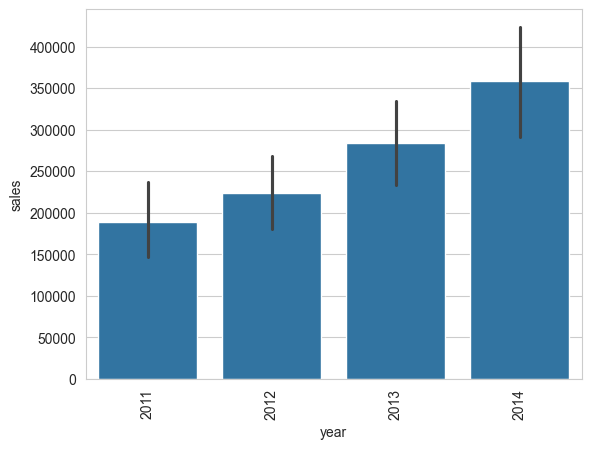

In [45]:
sns.barplot(x='year',y='sales',data=date_summary.reset_index())
plt.xticks(rotation = 'vertical')